In [1]:
import numpy as np
from scipy.fft import dct,idct
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from image_comression import *
from run_length import *

# Separating into 8x8 blocks

In [2]:
image_array = cv2.resize(cv2.imread("D:\sem_7\Image_and_video_coding\Video_codec\\video-codec\Pattern.jpg",0), (640, 640))
blocks = get_blocks(image_array)

640 640
0 0


In [ ]:
plt.imshow(blocks[0],cmap="gray")
# print(image_array.shape)

In [ ]:
print(blocks[0])

# Discrete cosine transform for macro blocks

In [3]:
dct_blocks = get_dct_blocks(blocks)

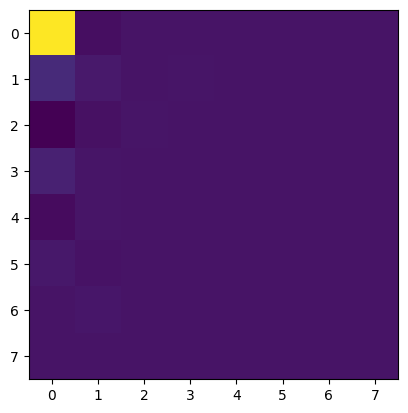

In [4]:
plt.imshow(dct_blocks[0])

# Quantize

In [7]:
high_quntized_blocks = (quantize_blocks(dct_blocks,"high")/8).astype(int)
low_quntized_blocks = quantize_blocks(dct_blocks,"low")
mid_quntized_blocks = quantize_blocks(dct_blocks,"mid")

In [ ]:
uniques_low,counts_low = np.unique(high_quntized_blocks,return_counts = True)
print(len(uniques_low))

# Huffman coding (entropy coding)

In [8]:
huffman_codes_list_high = compress(high_quntized_blocks,"high.txt")
huffman_codes_list_low = compress(low_quntized_blocks,"low.txt")
huffman_codes_list_mid = compress(mid_quntized_blocks,"mid.txt")

# Decoding the blocks

In [9]:
result_blocks_high = decode_blocks('high.txt',huffman_codes_list_high)
result_blocks_low = decode_blocks('low.txt',huffman_codes_list_low)
result_blocks_mid = decode_blocks('mid.txt',huffman_codes_list_mid)

# Reconstructing the decoded blocks

In [10]:
reconstructed_high = reconstruct_from_blocks(result_blocks_high)
reconstructed_low = reconstruct_from_blocks(result_blocks_low)
reconstructed_mid = reconstruct_from_blocks(result_blocks_mid)

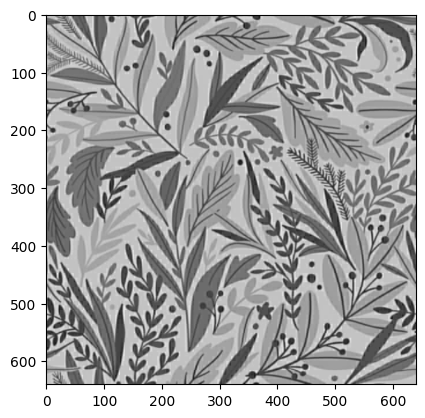

In [11]:
plt.imshow(reconstructed_high,cmap='gray')

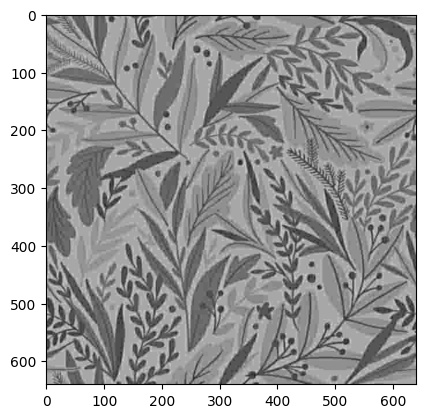

In [12]:
plt.imshow(reconstructed_low,cmap='gray')

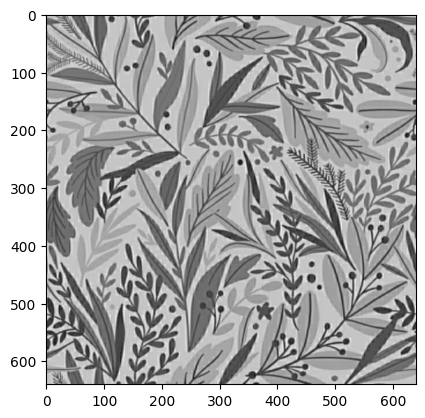

In [13]:
plt.imshow(reconstructed_mid,cmap='gray')

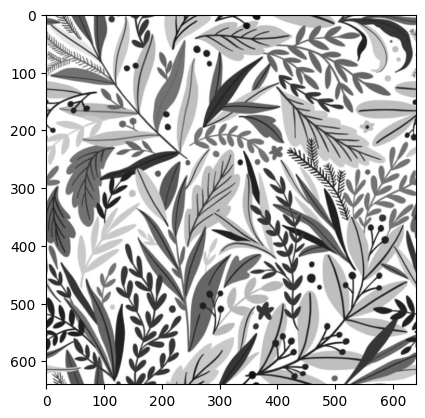

In [14]:
plt.imshow(image_array,cmap='gray')

# Run length coding

In [ ]:
matrix = np.array([[16,  16,  16,  16,  24,  40,  51,  0], 
                    [16,  16,  16,  19,  26,  58,  0,  0],
                    [16,  16,  16,  24,  40,  57,  0,  0], 
                    [14,  17,  22,  29,  51,  0,  0,  0], 
                    [18,  22,  37,  56,  68, 0, 0,  0], 
                    [24,  35,  0,  0,  0, 0, 0,  0], 
                    [49,  64,  0,  0, 0, 0, 0, 0], 
                    [72,  92,  0,  0, 0, 0, 0,  0]])

In [ ]:
# high_quntized_blocks = quantize_blocks(dct_blocks,"high")
# low_quntized_blocks = quantize_blocks(dct_blocks,"low")
# mid_quntized_blocks = quantize_blocks(dct_blocks,"mid")

In [8]:
def compress_run_length_blocks(blocks):
    result_string = ''
    for block in blocks:
        block = block
        print(block.shape)
        bit_sequence = compress_image(block)
        result_string = result_string + bit_sequence + "\n"
        print(result_string)
    with open("run_length.txt", 'w') as f:
        f.write(result_string)

In [10]:
print(high_quntized_blocks[7].shape)

(8, 8)


In [13]:
compress_run_length_blocks(high_quntized_blocks)

In [ ]:
def decompress_run_length(location):

    with open(location, 'r') as file:
        text_string = file.read().strip()

    block_strings = text_string.split("\n")

    result_blocks = np.empty((0, 8,8))

    for index,string in enumerate(block_strings):
        decompressed_block = decompress_bit_sequence(string)
        result_blocks = np.concatenate((result_blocks, [decompressed_block]), axis=0)
    
    result_blocks = result_blocks.astype(int)
    return result_blocks

In [ ]:
result_blocks = decompress_run_length("run_length.txt")

# Calculating entropies

In [ ]:
print("Original - ",get_entropy(image_array))
print(get_entropy(reconstructed_high))
print(get_entropy(reconstructed_mid))
print(get_entropy(reconstructed_low))

# Calculating compression ratios

In [ ]:
compression_ratio_high = 8/average_length(reconstructed_high,huffman_codes_list_high)
compression_ratio_mid = 8/average_length(reconstructed_mid,huffman_codes_list_mid)
compression_ratio_low = 8/average_length(reconstructed_mid,huffman_codes_list_mid)

print(compression_ratio_high)
print(compression_ratio_mid)
print(compression_ratio_low)